In [1]:
import geopandas as gp
import pandas as pd
import os
#import json
#import pylab as pl
import zipfile
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
#download energy data 
!curl -O 'https://data.cityofnewyork.us/api/views/jzst-u7j8/rows.csv?accessType=DOWNLOAD'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2865k    0 2865k    0     0  1290k      0 --:--:--  0:00:02 --:--:-- 1290k


In [16]:
nrg = gp.GeoDataFrame.from_csv('rows.csv?accessType=DOWNLOAD')
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Street Number,Street Name,Borough,Zip Code,BBL on the Covered Buildings List,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
2734969.0,1010950035,NaN,NaN,1027122,653,11 AVENUE,MANHATTAN,10036.0,Yes,In Compliance,...,No,Manual,31,1190.2,345.2,845,153363,153363.0,Hotel,1.0
2741228.0,1021390017,NaN,NaN,1063400,1050,RIVERSIDE DRIVE,MANHATTAN,10032.0,Yes,In Compliance,...,No,None,20,4573.1,0,4573.1,256013,213214.0,Office,1.0
3108893.0,1008020056,NaN,NaN,1015051,122,WEST 27 STREET,MANHATTAN,10001.0,Yes,In Compliance,...,No,None,78,698.5,302.6,395.9,117291,117291.0,Office,1.0
3893138.0,1006970031,NaN,NaN,1012384,259,10 AVENUE,MANHATTAN,10001.0,Yes,In Compliance,...,Yes,Manual,39,1249.9,385.1,864.8,215000,214780.0,K-12 School,1.0
4495647.0,1001727501,NaN,NaN,1001866,374,BROADWAY,MANHATTAN,10013.0,Yes,In Compliance,...,No,None,79,557.6,390.4,167.2,121689,137500.0,Multifamily Housing,1.0


In [5]:
#download Bronx pluto data 
if not os.path.exists('bx'):
    os.makedirs('bx') 
    
if not os.path.exists('bx/bx_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bx_mappluto_16v2.zip'
    os.system("mv bx_mappluto_16v2.zip bx")
    
if not os.path.exists('bx/BXMapPLUTO.shp'):    
    zf = zipfile.ZipFile('bx/' + 'bx_mappluto_16v2.zip')
    zf.extractall("bx")
    zf.close



In [6]:
#download Brooklyn pluto data 
if not os.path.exists('bk'):
    os.makedirs('bk') 
    
if not os.path.exists('bk/bk_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bk_mappluto_16v2.zip'
    os.system("mv bk_mappluto_16v2.zip bk")
    
if not os.path.exists('bk/BKMapPLUTO.shp'):    
    zf = zipfile.ZipFile('bk/' + 'bk_mappluto_16v2.zip')
    zf.extractall("bk")
    zf.close

In [7]:
#download Manhattan pluto data 
if not os.path.exists('mn'):
    os.makedirs('mn') 
    
if not os.path.exists('mn/mn_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip'
    os.system("mv mn_mappluto_16v2.zip mn")
    
if not os.path.exists('mn/MNMapPLUTO.shp'):    
    zf = zipfile.ZipFile('mn/' + 'mn_mappluto_16v2.zip')
    zf.extractall("mn")
    zf.close

In [8]:
#download Queens pluto data 
if not os.path.exists('qn'):
    os.makedirs('qn') 
    
if not os.path.exists('qn/qn_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/qn_mappluto_16v2.zip'
    os.system("mv qn_mappluto_16v2.zip qn")
    
if not os.path.exists('qn/BKMapPLUTO.shp'):    
    zf = zipfile.ZipFile('qn/' + 'qn_mappluto_16v2.zip')
    zf.extractall("qn")
    zf.close

In [9]:
#download Staten Island pluto data 
if not os.path.exists('si'):
    os.makedirs('si') 
    
if not os.path.exists('si/si_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/si_mappluto_16v2.zip'
    os.system("mv si_mappluto_16v2.zip si")
    
if not os.path.exists('si/BKMapPLUTO.shp'):    
    zf = zipfile.ZipFile('si/' + 'si_mappluto_16v2.zip')
    zf.extractall("si")
    zf.close

In [10]:
#read in files
P_bx = gp.read_file('bx/BXMapPLUTO.shp')
P_bk = gp.read_file('bk/BKMapPLUTO.shp')
P_mn = gp.read_file('mn/MNMapPLUTO.shp')
P_qn = gp.read_file('qn/QNMapPLUTO.shp')
P_si = gp.read_file('si/SIMapPLUTO.shp')

In [17]:
nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identification Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'BBL on the Covered Buildings List',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [18]:
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)':'BBL'}, 
           inplace=True)
nrg_1 = nrg[['BBL', 'Weather Normalized Site EUI(kBtu/ft2)']]
nrg_1.rename(columns={'Weather Normalized Site EUI(kBtu/ft2)':'Site_EUI'}, 
           inplace=True)
nrg_1.head()


/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,BBL,Site_EUI
Record Number,,
2734969.0,1010950035,106.4
2741228.0,1021390017,246.9
3108893.0,1008020056,70.1
3893138.0,1006970031,80.7
4495647.0,1001727501,74.4


In [54]:
P_bx.crs = from_epsg(4326) 
P_bx.head()

,APPBBL,APPDate,Address,AreaSource,AssessLand,AssessTot,BBL,BldgArea,BldgClass,BldgDepth,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.0,None,270 EAST 137 STREET,2,138600.0,831150.0,2.023180e+09,11700,K7,100.0,...,0,1911,None,10454,M1-4/R7A,None,None,None,6a,"POLYGON ((1004162.726199999 234386.1791999936,..."
1,0.0,None,69 BRUCKNER BOULEVARD,2,24211.0,35042.0,2.022960e+09,5120,S3,64.0,...,0,1915,None,10454,M1-2/R6A,None,None,None,6a,"POLYGON ((1004680.847200006 233094.8020000011,..."
2,0.0,None,348 EAST 134 STREET,2,18000.0,188100.0,2.022960e+09,4875,E9,85.0,...,0,2008,None,10454,M1-2/R6A,None,None,None,6a,"POLYGON ((1004668.343999997 233334.0714000016,..."
3,0.0,None,51 BRUCKNER BOULEVARD,2,10203.0,13989.0,2.022960e+09,5120,S4,64.0,...,0,1915,None,10454,M1-2/R6A,None,None,None,6a,"POLYGON ((1004571.2324 233271.8015999943, 1004..."
4,0.0,None,2441 3 AVENUE,2,315450.0,1294650.0,2.023190e+09,83936,D9,135.0,...,0,1917,None,10451,M1-3/R8,None,None,None,6a,"POLYGON ((1003446.053599998 234160.9472000003,..."


In [19]:
C_bx = P_bx[['BBL', 'ZipCode', 'geometry']]
C_bk = P_bk[['BBL', 'ZipCode', 'geometry']]
C_mn = P_mn[['BBL', 'ZipCode', 'geometry']]
C_qn = P_qn[['BBL', 'ZipCode', 'geometry']]
C_si = P_si[['BBL', 'ZipCode', 'geometry']]

In [20]:
Char_b = C_bx.append(C_bk)
Char_b = Char_b.append(C_mn)
Char_b = Char_b.append(C_qn)
Char_b = Char_b.append(C_si)

In [58]:
bblnrgdata = Char_b.merge(nrg_1, on='BBL')

In [66]:
len(bblnrgdata)

13737

In [65]:
bblnrgdata.head()

,BBL,ZipCode,geometry,Site_EUI
0,2.023190e+09,10451,"POLYGON ((1003389.165600002 234484.7893999964,...",11.6
1,2.023110e+09,10454,"POLYGON ((1004905.556400001 234392.8328000009,...",See Primary BBL
2,2.023080e+09,10454,"POLYGON ((1004079.848199993 233318.4047999978,...",NaN
3,2.023160e+09,10454,"POLYGON ((1003301.432799995 233415.831400007, ...",NaN
4,2.023190e+09,10451,"POLYGON ((1003369.369200006 233849.1661999971,...",NaN


In [31]:
import shapely
from geopandas import GeoDataFrame
import matplotlib.pylab as pl
from fiona.crs import from_epsg

In [39]:
temp = pd.DataFrame.from_csv('a_2014 Summer.csv',index_col=None)
temp.head()

,lon,lat,Day Temperature,Night temperature
0,-74.500000,40.73,25.614070,16.664333
1,-74.492308,40.73,25.348052,16.648848
2,-74.484615,40.73,24.873467,16.492773
3,-74.476923,40.73,24.397762,16.065568
4,-74.469231,40.73,24.306395,15.685205


In [40]:
temp['lonlat'] = zip(temp.lon, temp.lat)
# Create Point Geometry for based on lonlat column
temp['geometry'] = temp[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
temp.head()

,lon,lat,Day Temperature,Night temperature,lonlat,geometry
0,-74.500000,40.73,25.614070,16.664333,"(-74.5, 40.73)",POINT (-74.5 40.73)
1,-74.492308,40.73,25.348052,16.648848,"(-74.49230769, 40.73)",POINT (-74.49230769 40.73)
2,-74.484615,40.73,24.873467,16.492773,"(-74.48461538, 40.73)",POINT (-74.48461537999999 40.73)
3,-74.476923,40.73,24.397762,16.065568,"(-74.47692308, 40.73)",POINT (-74.47692308000001 40.73)
4,-74.469231,40.73,24.306395,15.685205,"(-74.46923077, 40.73)",POINT (-74.46923077 40.73)


In [97]:
bblnrgdata.crs = from_epsg(2263)
bblnrgdata = bblnrgdata.to_crs(epsg = 4326)

In [170]:
bblnrgdata.head()

,BBL,ZipCode,geometry,Site_EUI
0,2.023190e+09,10451,POLYGON ((-73.93086116103255 40.81026162343134...,11.6
1,2.023110e+09,10454,"POLYGON ((-73.92538359544568 40.8100058129941,...",See Primary BBL
2,2.023080e+09,10454,"POLYGON ((-73.9283695671045 40.80705869843541,...",NaN
3,2.023160e+09,10454,"POLYGON ((-73.9311811229686 40.80732782026655,...",NaN
4,2.023190e+09,10451,POLYGON ((-73.93093448443263 40.80851705733697...,NaN


In [169]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(temp)):
    if len(bblnrgdata.geometry.intersects(temp.iloc[i].geometry).unique()) > 1:
        a.append(bblnrgdata[bblnrgdata.geometry.intersects(temp.iloc[i].geometry)].Site_EUI.values[0])
    else:
        a.append('0')
    print '\r',"%",str((i+1)*100./len(temp))[:4],
temp['Site_EUI'] = a

% 99.2               32.3               60.0                      100.


In [185]:
bblnrgdata[bblnrgdata.geometry.intersects(temp.iloc[69].geometry)]


,BBL,ZipCode,geometry,Site_EUI


In [174]:
temp[temp.Site_EUI != '0']

,lon,lat,Day Temperature,Night temperature,lonlat,geometry,Site_EUI
64,-74.007692,40.73,27.876376,21.689352,"(-74.00769231, 40.73)",POINT (-74.00769231 40.73),130.4
65,-74.000000,40.73,27.399282,21.715969,"(-74.0, 40.73)",POINT (-74 40.73),79.4
68,-73.976923,40.73,28.318550,21.485411,"(-73.97692308, 40.73)",POINT (-73.97692308000001 40.73),57.3
90,-73.807692,40.73,31.097841,19.116153,"(-73.80769231, 40.73)",POINT (-73.80769230999999 40.73),Not Available


In [179]:
bblnrgdata['Site_EUI'] = pd.to_numeric(bblnrgdata['Site_EUI'], errors = 'coerce')
bblnrgdata_1 = bblnrgdata[bblnrgdata.Site_EUI > 0]

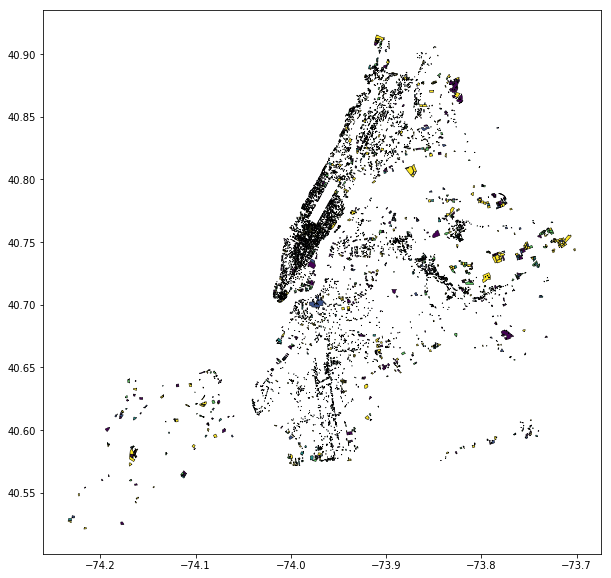

In [182]:
f, ax = plt.subplots(figsize=(10,10))
bblnrgdata_1.plot(column = 'Site_EUI',colormap ='viridis' ,alpha = 1,scheme = 'quantiles', linewidth = 0.5, ax = ax)